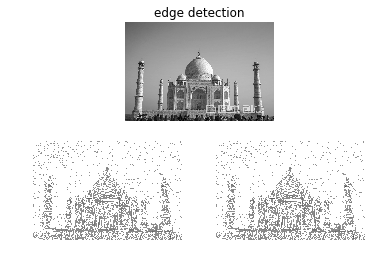

In [67]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.signal as signal     # 导入sicpy的signal模块

# 生成高斯算子的函数
def func(x,y,sigma=1):
    return 100*(1/(2*np.pi*sigma))*np.exp(-((x-2)**2+(y-2)**2)/(2.0*sigma**2))

# 生成标准差为5的5*5高斯算子
suanzi1 = np.fromfunction(func,(5,5),sigma=5)
# Laplace算子
suanzi2 = np.array([[0, 1, 0],  
                    [1,-4, 1],
                    [0, 1, 0]])

# Laplace扩展算子
suanzi3 = np.array([[1, 1, 1],
                    [1,-8, 1],
                    [1, 1, 1]])

# 打开图像并转化成灰度图像
image = Image.open("d:\computervision\img_4.png").convert("L")
image_array = np.array(image)
# 利用生成的高斯算子与原图像进行卷积对图像进行平滑处理
image_blur = signal.convolve2d(image_array, suanzi1, mode="same")

# 利用signal的convolve计算卷积
image_suanzi1 = signal.convolve2d(image_blur,suanzi2,mode="same")
image_suanzi2 = signal.convolve2d(image_blur,suanzi3,mode="same")

# 将卷积结果转化成0~255
image_suanzi1 = (image_suanzi1/float(image_suanzi1.max()))*255
image_suanzi2 = (image_suanzi2/float(image_suanzi2.max()))*255

# 为了使看清边缘检测结果，将大于灰度平均值的灰度变成255(白色)
image_suanzi1[image_suanzi1>image_suanzi1.mean()] = 255
image_suanzi2[image_suanzi2>image_suanzi2.mean()] = 255

# 显示图像
plt.subplot(2,1,1)
plt.imshow(image_array,cmap=cm.gray)
plt.title("edge detection")
plt.axis("off")
plt.subplot(2,2,3)
plt.imshow(image_suanzi1,cmap=cm.gray)
plt.axis("off")
plt.subplot(2,2,4)
plt.imshow(image_suanzi2,cmap=cm.gray)
plt.axis("off")
plt.show()

Wall time: 320 ms


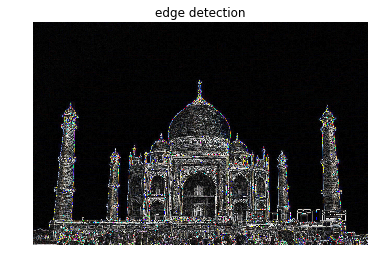

In [68]:
%%time
from skimage import color
from skimage import exposure
from scipy.signal import convolve2d
import numpy as np
import imageio
import matplotlib.pyplot as plt
# import image
pic = imageio.imread('d:\computervision\img_4.png')
# right sobel
sobel_x = np.c_[
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
]
# top sobel
sobel_y = np.c_[
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
]
ims = []
for i in range(3):
    sx = convolve2d(pic[:,:,i], sobel_x, mode="same", boundary="symm")
    sy = convolve2d(pic[:,:,i], sobel_y, mode="same", boundary="symm")
    ims.append(np.sqrt(sx*sx + sy*sy))
img_conv = np.stack(ims, axis=2).astype("uint8")
plt.figure(figsize = (6,5))
plt.title("edge detection")
plt.axis('off')
plt.imshow(img_conv);

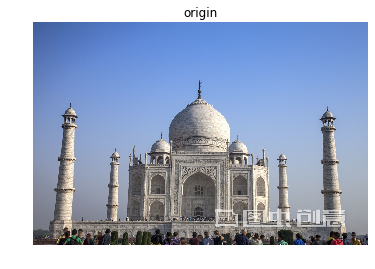

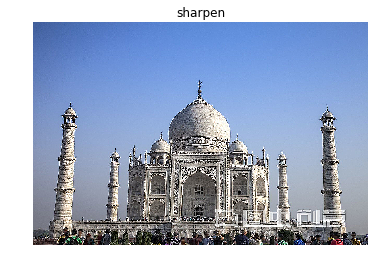

In [74]:
import cv2
img = cv2.imread('d:\computervision\img_4.png')
img1=img[:,:,::-1]
plt.figure(figsize = (6,5))
plt.title("origin")
plt.axis('off')
plt.imshow(img1)
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)
#kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
dst = cv2.filter2D(img, -1, kernel=kernel) 
#b,g,r=cv2.split(dst)
#dst=cv2.merge([r,g,b])
img2=dst[:,:,::-1]
plt.figure(figsize = (6,5))
plt.title("sharpen")
plt.axis('off')
plt.imshow(img2)

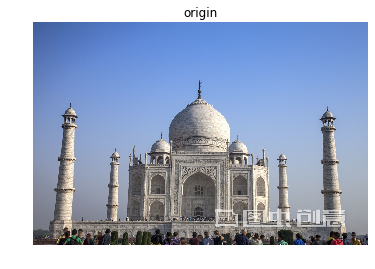

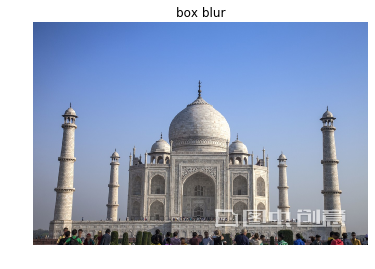

In [76]:
import cv2
img = cv2.imread('d:\computervision\img_4.png')
img1=img[:,:,::-1]
plt.figure(figsize = (6,5))
plt.title("origin")
plt.axis('off')
plt.imshow(img1)
kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]], np.float32)
#kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
dst = cv2.filter2D(img, -1, kernel=kernel*1/9) 
#b,g,r=cv2.split(dst)
#dst=cv2.merge([r,g,b])
img2=dst[:,:,::-1]
plt.figure(figsize = (6,5))
plt.title("box blur")
plt.axis('off')
plt.imshow(img2)

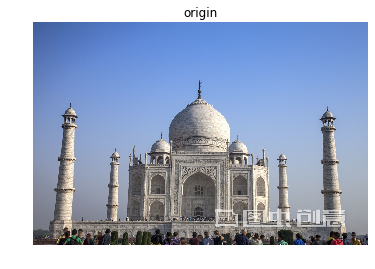

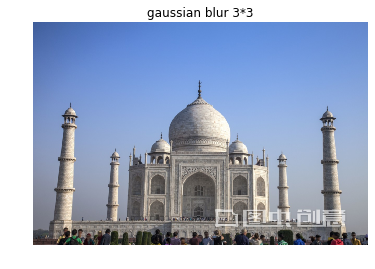

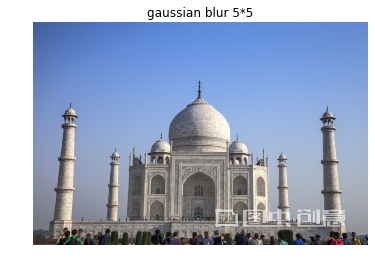

In [78]:
import cv2
img = cv2.imread('d:\computervision\img_4.png')
img1=img[:,:,::-1]
plt.figure(figsize = (6,5))
plt.title("origin")
plt.axis('off')
plt.imshow(img1)
kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], np.float32)
#kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
dst = cv2.filter2D(img, -1, kernel=kernel*1/16) 
#b,g,r=cv2.split(dst)
#dst=cv2.merge([r,g,b])
img2=dst[:,:,::-1]
plt.figure(figsize = (6,5))
plt.title("gaussian blur 3*3")
plt.axis('off')
plt.imshow(img2)
kernel = np.array([[1, 4,6,4, 1], [4,16, 24,16, 4], [6, 24, 36,24,6],[4,16,24,16,4],[1,4,6,4,1]], np.float32)
#kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
dst = cv2.filter2D(img, -1, kernel=kernel*1/256) 
#b,g,r=cv2.split(dst)
#dst=cv2.merge([r,g,b])
img2=dst[:,:,::-1]
plt.figure(figsize = (6,5))
plt.title("gaussian blur 5*5")
plt.axis('off')
plt.imshow(img2)